<a href="https://colab.research.google.com/github/SShalini24/Heart-Diseases-Prediction-/blob/main/Copy_of_Final_Copy_of_DatamitesProject1_Succ_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediction and Forcasting System**

---






The Major Killer of Human Death is Heart Disease.Healthcare Industries has huge amount of data that contains hidden information.This information supports decision making process on related areas. In this research, we have discussed various approcah of data mining which are useful in predicting the heart diseases. **Heart DiseasPrediction Sysytem Machine Learning Project is an emerging AI application that use different analytics and techniques to improve the performance of particuler machine learning from old data**.Some of the ways of predicting heart diseases are ECG,stress test and heart MRI etc. Here the system uses 14 parameters for predicting heart diseases that include blood pressure ,cholesterol,chest pain and heart rate.These parameters are used to improve an accuracy level.The main aim of this research is to provide an analysis of data mining techniques on diagnosing heart disease.


Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
import warnings 
warnings.filterwarnings('ignore')


Data Collection and Processing 

In [ ]:
# loading the csv data to a Pandas Dataframe

In [ ]:
heart_data = pd.read_csv('/content/values.csv')
heart_data.head()  # printing first 5 rows of the dataframe 

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


Domian Analysis : Heart Disease DataSet

# **SLOPE:**

The ST segment shift relative to exercise-induced increments in heart rate, the ST/heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD)

# **THAL:**

Thal is a blood disorder called thalassemia. People with thalassemia can get too much iron in their bodies, either from the disease or from frequent blood transfusions. Too much iron can result in damage to your heart, liver and endocrine system, which includes hormone-producing glands that regulate processes throughout your body

# **RESTING BLOOD PRESSURE:**

High blood pressure can damage your arteries by making them less elastic, which decreases the flow of blood and oxygen to your heart and leads to heart disease. In addition, decreased blood flow to the heart can cause: Chest pain, also called angina.

# **CHEST PAIN TYPE:**

Pressure, fullness, burning or tightness in the chest. Crushing or searing pain that spreads to the back, neck, jaw, shoulders, and one or both arms. Pain that lasts more than a few minutes, gets worse with activity, goes away and comes back, or varies in intensity. Shortness of breath.

# **NUM MAJOR VESSELS:**

The 2 main coronary arteries are the left main and right coronary arteries.

# **FASTING BLOOD SUGAR:**

Over time, high blood sugar can damage blood vessels and the nerves that control your heart. People with diabetes are also more likely to have other conditions that raise the risk for heart disease: High blood pressure increases the force of blood through your arteries and can damage artery walls.

# **RESTING EKG:**

The resting ECG is a simple, quick and painless test. The resting ECG can detect certain heart conditions such as hypertrophy of heart, ischemia, myocardial infarction, sequelae of myocardial infarction, cardiac arrhythmias, etc. The test takes about 5 minutes and no preparation is necessary.

# **SERUM CHOLESTROL:**

Serum cholesterol can give an overview of a person's cholesterol levels. The number of triglycerides and LDL and HDL cholesterol in the blood can indicate the risk of a severe heart condition, such as a heart attack or stroke.

# **OLD PEAK:**

Old peak = ST depression induced by exercise relative to rest.

# **MAXIMUM HEART RATE:**

You can estimate your maximum heart rate based on your age. To estimate your maximum age-related heart rate, subtract your age from 220. For example, for a 50-year-old person, the estimated maximum age-related heart rate would be calculated as 220 – 50 years = 170 beats per minute (bpm).

# **EXERCISE INDUCED ANGINA**

It usually happens during activity (exertion) and goes away with rest or angina medication. For example, pain that comes on when you're walking uphill or in the cold weather may be angina. Stable angina pain is predictable and usually similar to previous episodes of chest pain.

In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(180, 15)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [ ]:
# checking for missing values
heart_data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [ ]:
# getting statistical measures of the data
heart_data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [ ]:
# checking the distribution of Target variable 
heart_data['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

1 --> Defective Heart


0 --> Healthy Heart





In [ ]:
# Dropping the unwanted columns 
heart_data.drop(columns=['patient_id'],axis=1,inplace=True)

In [ ]:
heart_data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [ ]:
# Renaming the columns 
heart_data.rename({'slope_of_peak_exercise_st_segment':'slope',
                   'resting_blood_pressure':'rbp',
                   'chest_pain_type':'cpt',
                   'num_major_vessels':'num_majves',
                   'fasting_blood_sugar_gt_120_mg_per_dl':'fasblsg',
                   'resting_ekg_results':'res_ekg',
                   'serum_cholesterol_mg_per_dl':'chol',
                   'oldpeak_eq_st_depression':'oldpeak',
                   'max_heart_rate_achieved':'max_heart_rate',
                   'exercise_induced_angina':'ex_angina',
                   'heart_disease_present':'target'},axis=1,inplace=True)

In [ ]:
heart_data

,slope,thal,rbp,cpt,num_majves,fasblsg,res_ekg,chol,oldpeak,sex,age,max_heart_rate,ex_angina,target
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


Lets See How The Data Is Distributed...

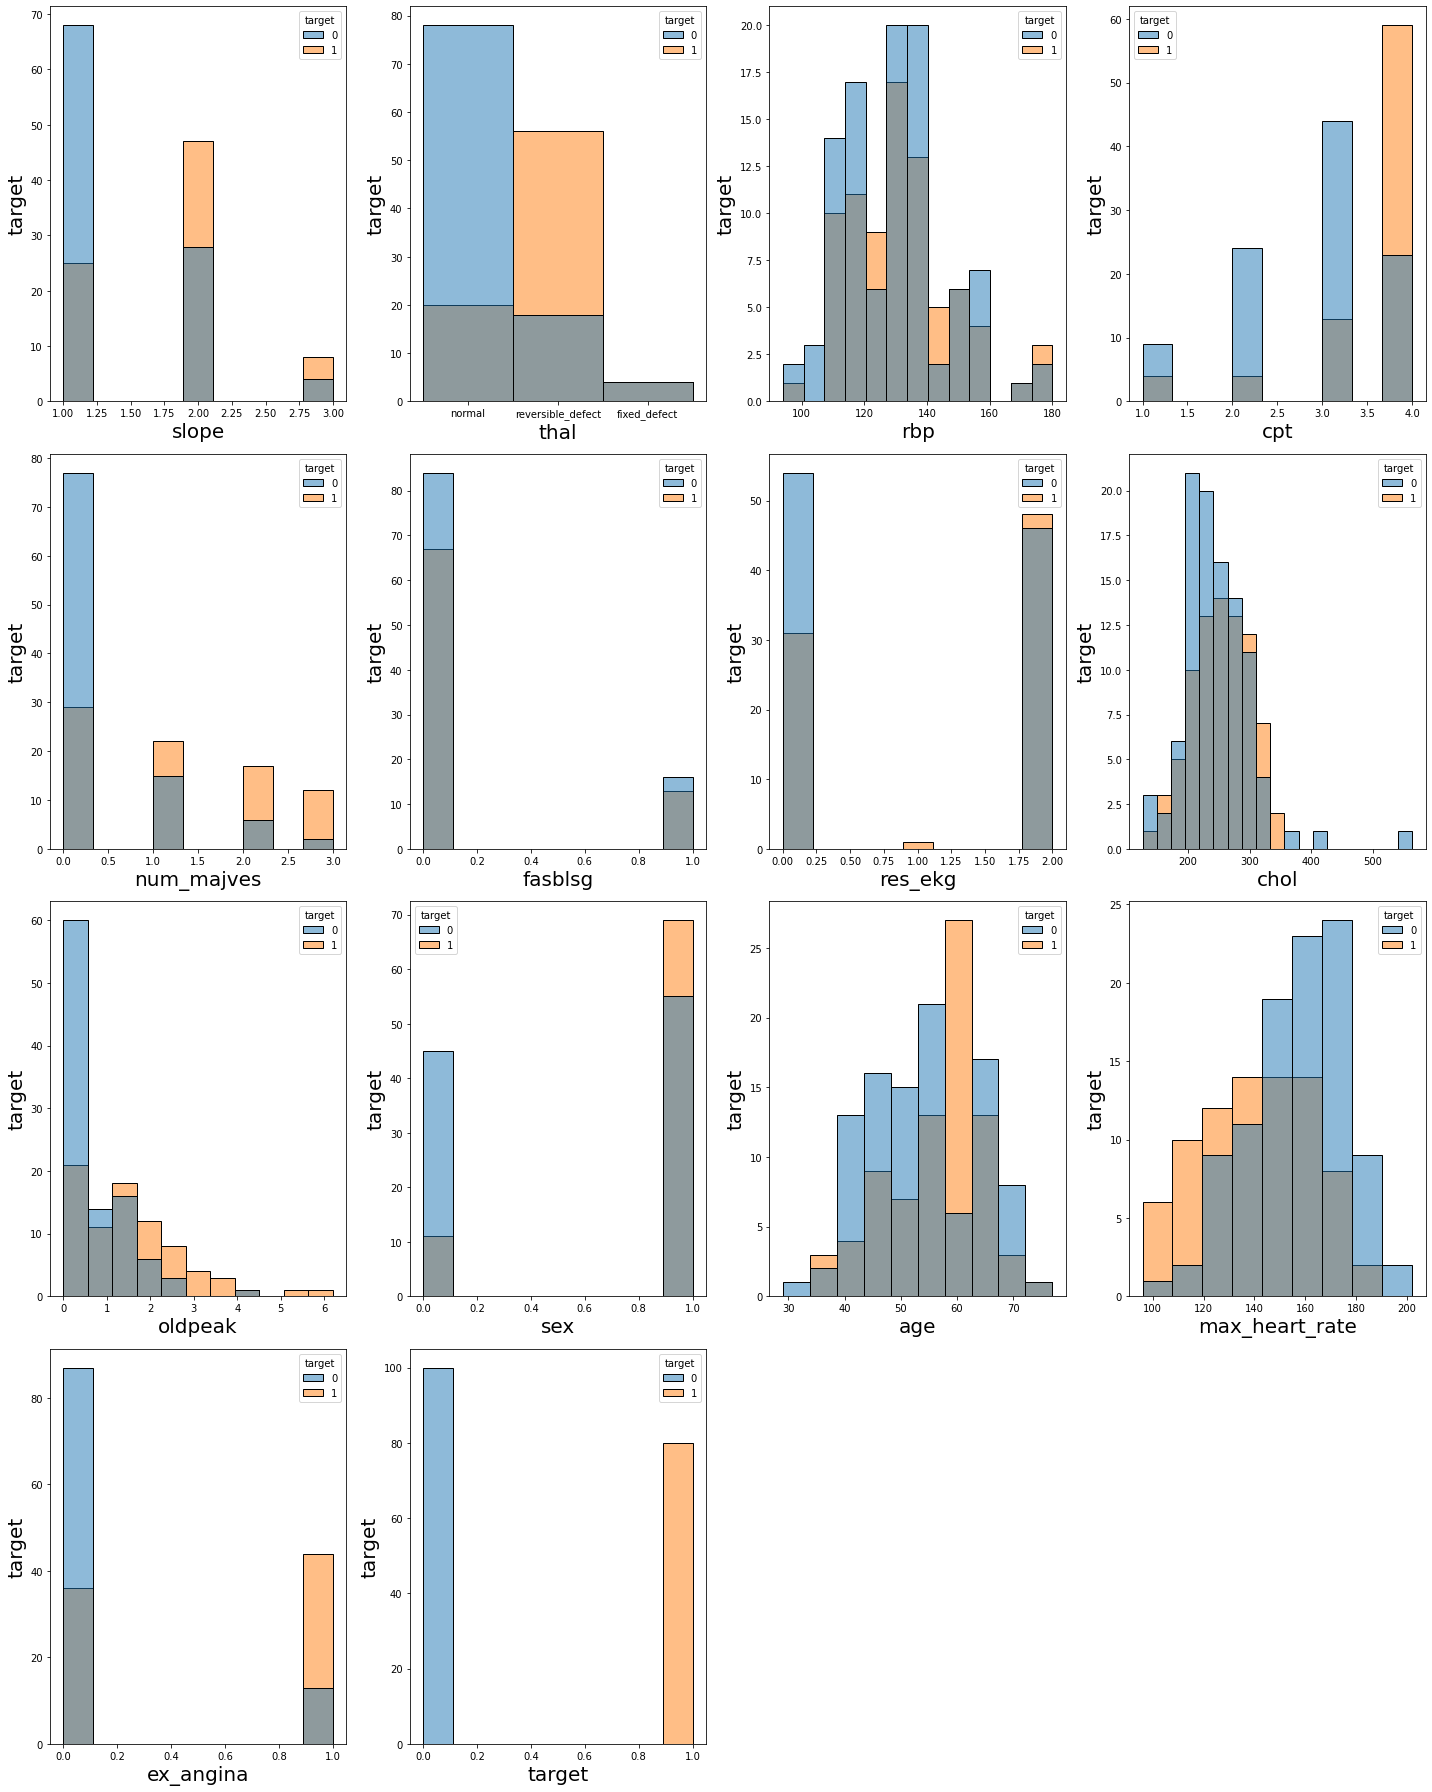

In [ ]:
plt.figure(figsize=(20,25),facecolor ='white')
plotnumber =1
for column in heart_data:
  if plotnumber<=16:
    ax=plt.subplot(4,4,plotnumber)
    sns.histplot(x=heart_data[column],hue=heart_data.target)
    plt.xlabel(column,fontsize=(20))
    plt.ylabel('target',fontsize=(20))
  plotnumber+=1
plt.tight_layout()


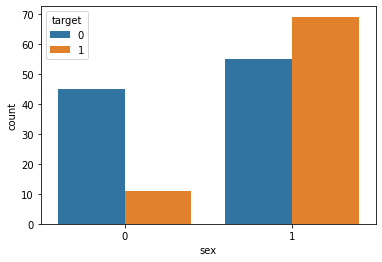

In [ ]:
sns.countplot(data=heart_data,x='sex',hue='target') # plotting a countplot to understand the impact of heart disease gender wise.
plt.show()

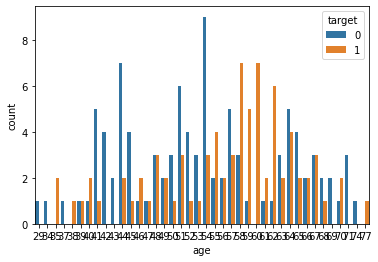

In [ ]:
sns.countplot(data=heart_data,x='age',hue='target')  # plotting a countplot to understand the impact of heart disease age wise.
plt.show()

In [ ]:
# Lets see how the Data is distributed for each column...

# **Insights from Bivariant Analysis**

**Slope**: At point 1 the heart disease is zero and point 2 the risk of heart disease starts.

**Thal**: In "Normal" state the heart disease risk is not found. 
However in "reversible_defect" the risk of heart disease is found.

**RBP**:In rbp the risk of heart disease is found after 120 points.

**CPT**:Patients with the cpt rate 4 is more prone for heart disease.

**Num_MJvas:**The risk of heart  disease is more of the num of major vessels is either 1.0 or more

**Fsblsg**: Unable to find difference or impact of fasting blood sugar report.

**Res_Ekg**: The risk of heart disease is found at the point 1.0.

**Chol**:The risk of heart disease is found at the point 150 and more.

**OldPeak**:In the oldpeak report tge risk of heart disease is found after 1.5 point 

**Sex**:As per sepearte graph shown for sex, looks like male are more prone to heart disease.

**Age**:As per seperate graph shown for age column, people with age 50 or above are more prone to heart disease.

**Max Heart Rate:** As per above report patients with heart rate less than or equal to 140 are having more risk of getting heart disease.

**Ex_Angina**: Patients having ex_angina rate of 1.0 are are having more risk of getting heart disease.

**Target**: "0" means "No Heart Disease" and 1 means "Heart Disease Exist".







Converting Categorical Data To Numerical using LabelEncoder

In [ ]:
# converting "thal" data to numerical data

from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
heart_data.thal = lc.fit_transform(heart_data.thal)  

In [ ]:
heart_data.head()

,slope,thal,rbp,cpt,num_majves,fasblsg,res_ekg,chol,oldpeak,sex,age,max_heart_rate,ex_angina,target
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [ ]:
heart_data.thal.value_counts()

1    98
2    74
0     8
Name: thal, dtype: int64

In [ ]:
# Lets see how the data is distributed for each columns using distplot

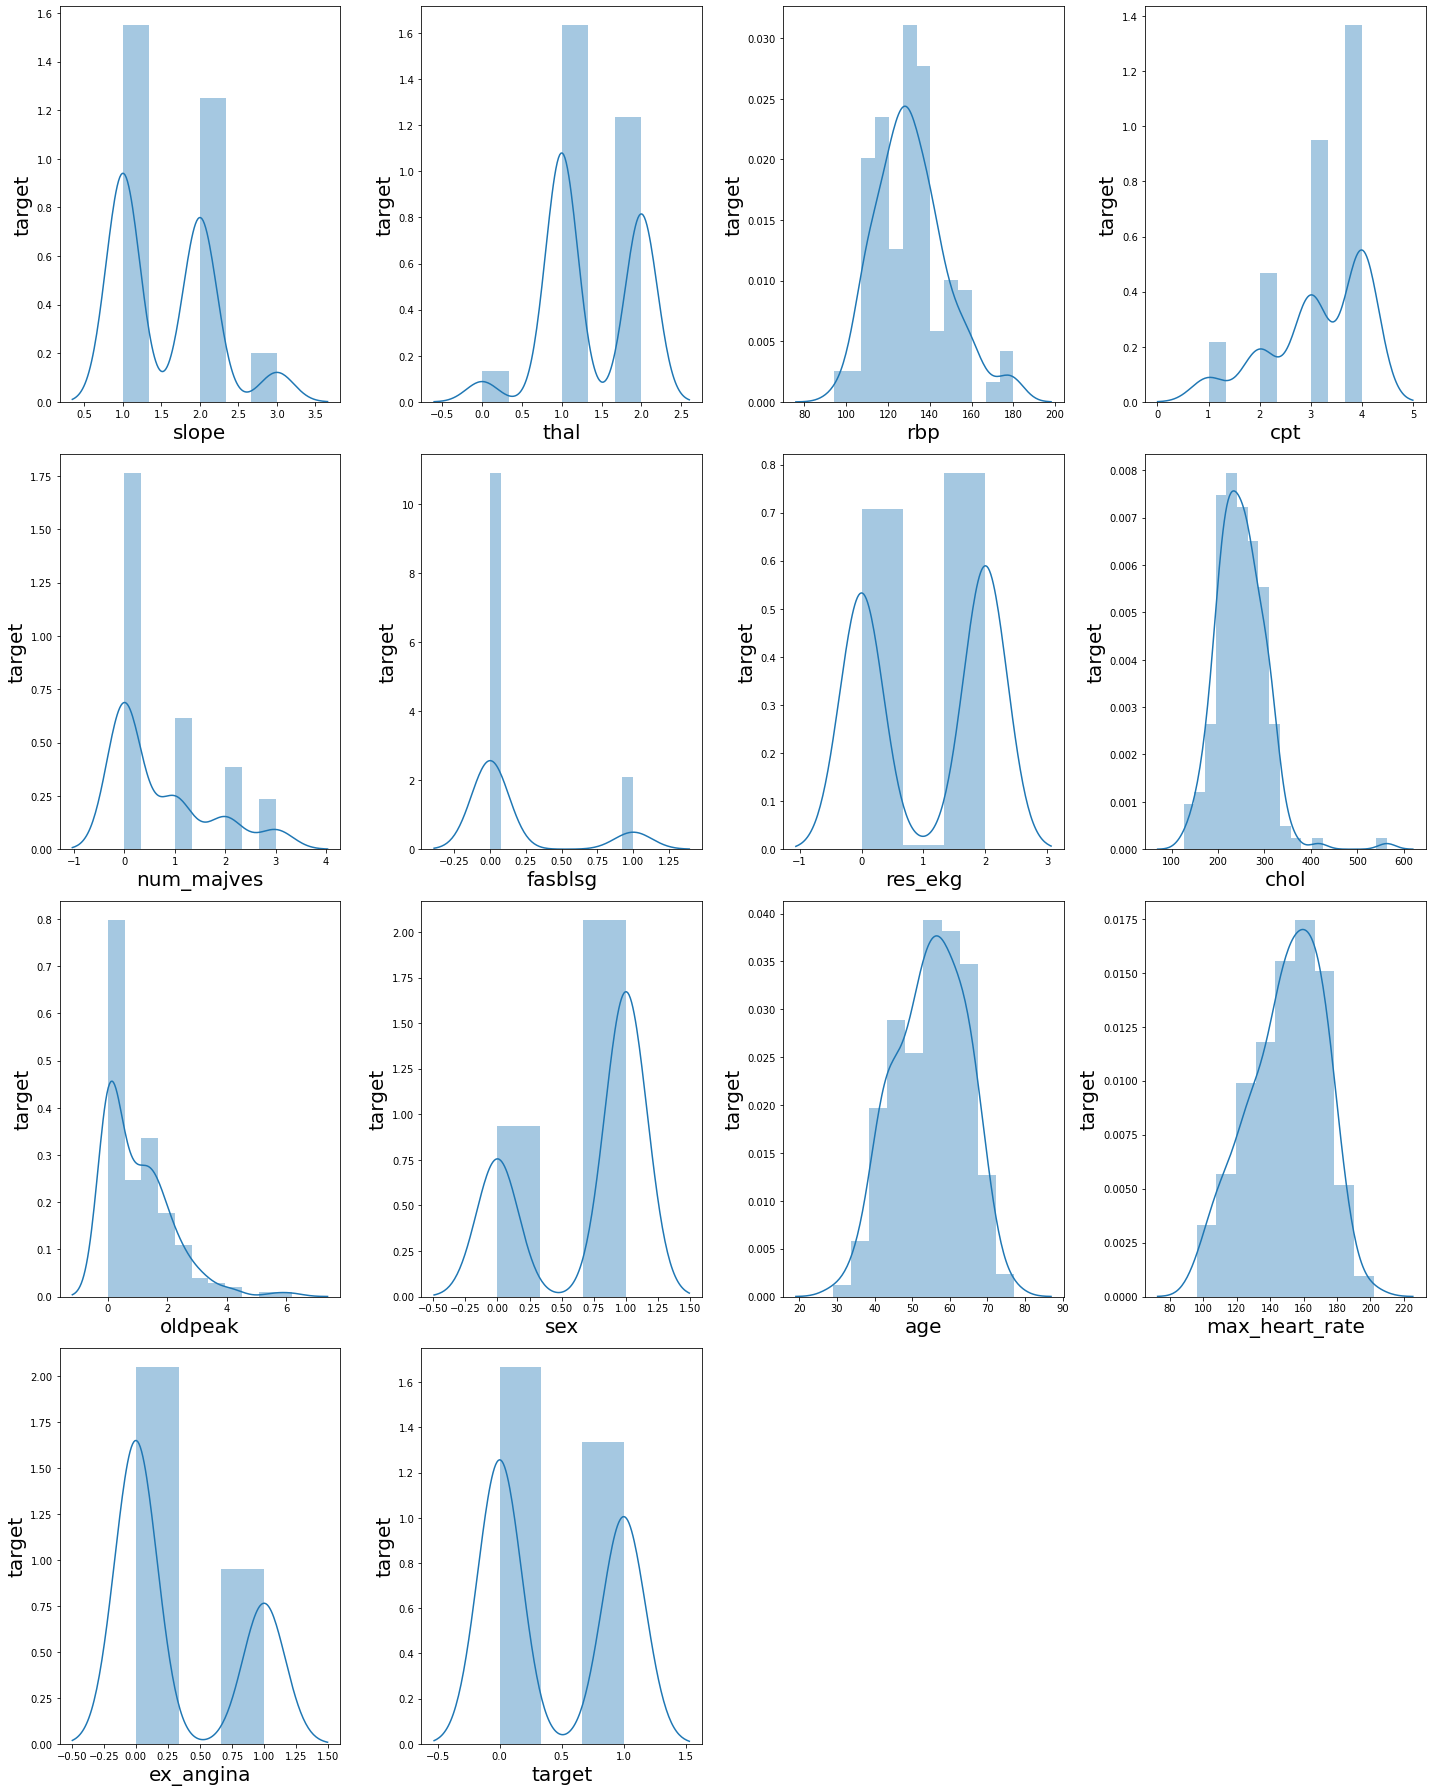

In [ ]:
plt.figure(figsize=(20,25),facecolor ='white')
plotnumber = 1
for column in heart_data:
  if plotnumber<=16:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(x=heart_data[column])
    plt.xlabel(column,fontsize=(20))
    plt.ylabel('target',fontsize=(20))
  plotnumber+=1
plt.tight_layout()

Splitting the Features and the Target

In [ ]:
x = heart_data.drop(columns='target',axis=1)
y = heart_data.target

In [ ]:
print(x)

     slope  thal  rbp  cpt  num_majves  fasblsg  res_ekg  chol  oldpeak  sex  \
0        1     1  128    2           0        0        2   308      0.0    1   
1        2     1  110    3           0        0        0   214      1.6    0   
2        1     1  125    4           3        0        2   304      0.0    1   
3        1     2  152    4           0        0        0   223      0.0    1   
4        3     2  178    1           0        0        2   270      4.2    1   
..     ...   ...  ...  ...         ...      ...      ...   ...      ...  ...   
175      2     2  125    4           2        1        0   254      0.2    1   
176      2     1  180    4           0        0        1   327      3.4    0   
177      2     2  125    3           0        0        0   309      1.8    1   
178      1     1  124    3           2        1        0   255      0.0    1   
179      1     1  160    3           1        0        0   201      0.0    0   

     age  max_heart_rate  ex_angina  
0

In [ ]:
print(y)

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: target, Length: 180, dtype: int64


Splitting the Data into Training and Testing Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify =y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(180, 13) (144, 13) (36, 13)


Model Training 

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with the Training data 

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

Model Evaluation 


Accuracy Score

In [ ]:
# accuracy on training data
x_train_prediction = model.predict(x_train)
x_train_prediction


array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
training_data_acc = accuracy_score(y_train,x_train_prediction)
print('Accuracy on training data',training_data_acc)

Accuracy on training data 0.8680555555555556


In [ ]:
# accuracy score on testing data 
y_pred1 = model.predict(x_test)
y_pred1

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
testing_data_acc = accuracy_score(y_test,y_pred1)
print('Accuracy on test data',testing_data_acc)

Accuracy on test data 0.8611111111111112


Building A Predictive System

In [ ]:
input_data = [1,2,130,4,1,0,0,253,1.4,1,60,144,1]

# changing the input_data into array

input_data_as_array = np.asarray(input_data)

# reshaping the input_data_as_array 

input_data_reshape = input_data_as_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if(prediction[0]==0):
  print("The Person does not have a Heart Disease")
else:
  print("The Person has a Heart Disease")


[1]
The Person has a Heart Disease


Using SVC (Support Vector Classifier) for Prediction 

In [ ]:
from sklearn import svm 
svm = svm.SVC()
svm.fit(x_train,y_train)

SVC()

In [ ]:
y_pred2=svm.predict(x_test)
accuracy_score(y_test,y_pred2)

0.6111111111111112

Using KNeighbors Classifier for Prediction 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)


In [ ]:
accuracy_score(y_test,y_pred)

0.5833333333333334

In [ ]:
score = []

for k in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_predict = knn.predict(x_test)
  score.append( accuracy_score(y_test,y_predict))

In [ ]:
score

[0.5,
 0.5833333333333334,
 0.6388888888888888,
 0.5277777777777778,
 0.5833333333333334,
 0.5555555555555556,
 0.5555555555555556,
 0.5555555555555556,
 0.5555555555555556,
 0.5277777777777778,
 0.5833333333333334,
 0.5833333333333334,
 0.6388888888888888,
 0.6388888888888888,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6944444444444444,
 0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888,
 0.6666666666666666,
 0.6666666666666666,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444]

In [ ]:
  knn = KNeighborsClassifier(n_neighbors=30)
  knn.fit(x_train,y_train)
  y_pred3 = knn.predict(x_test)
  knn_acc = accuracy_score(y_test,y_pred3)
  knn_acc
  

0.6388888888888888

Non Linear Ml Algorithims 

In [ ]:
heart_data.head() 


,slope,thal,rbp,cpt,num_majves,fasblsg,res_ekg,chol,oldpeak,sex,age,max_heart_rate,ex_angina,target
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [ ]:
heart_data.duplicated().sum()

0

Creating the Independent and Dependent Data

In [ ]:
x = heart_data.drop('target',axis=1)
y = heart_data.target

In [ ]:
# creating train and test data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4 = dt.predict(x_test)
dt_acc = accuracy_score(y_test,y_pred4)
dt_acc


0.8055555555555556

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(x_test)
rf_acc = accuracy_score(y_test,y_pred5)
rf_acc

0.8055555555555556

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6 = gbc.predict(x_test)
gbc_acc = accuracy_score(y_test,y_pred6)
gbc_acc

0.75

In [ ]:
f1_score = f1_score(y_test,y_pred6)
print(f1_score)

0.7567567567567567


Prediction On New Data

In [ ]:
df = pd.DataFrame(columns=['Models','ACC'])
df


,Models,ACC


In [ ]:
df.loc[0] = ['LR',86]
df.loc[1] = ['SVM',61]
df.loc[2] = ['KNN',63]
df.loc[3] = ['DT',80]
df.loc[4] = ['RF',80]
df.loc[5] = ['GBC',75]
df

,Models,ACC
0,LR,86
1,SVM,61
2,KNN,63
3,DT,80
4,RF,80
5,GBC,75


In [ ]:
accuracy_data = {'LR':86,'SVM':61,'KNN':63,'DT':80,'RF':80,'GBC':75}
Models  = list(accuracy_data.keys())
ACC = list(accuracy_data.values())

Text(0.5, 1.0, 'Accuracy Rate for Different Models')

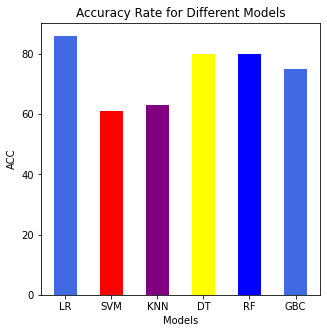

In [ ]:
plt.figure(figsize=(5,5))
color = ['royalblue','red','purple','yellow','blue']
plt.bar(Models,ACC,color=color,width=0.5)
plt.xlabel('Models')
plt.ylabel('ACC')
plt.title("Accuracy Rate for Different Models")



In [ ]:
# As per above report LR ,DT and RF all three are the best models for predicting the Heart Diseases.
# In this case taking RF with 80 per cent accuracy we are taking as our best model over Decision Tree and Logistic Regression for below reasons ..

# A decision tree combines some decisions, whereas a random forest combines several decision trees.

#### Advantages of Random Forest over other models:

# Impressive in Versatility.
# Parallelizable. They are parallelizable, meaning that we can split the process to multiple machines to run. ...
# Great with High dimensionality. ...
# Quick Prediction/Training Speed. ...
# Robust to Outliers and Non-linear Data. ...
# Handles Unbalanced Data. ...
# Low Bias, Moderate Variance.



In [ ]:
x= heart_data.drop('target',axis=1)
y = heart_data.target

In [ ]:
# importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)  # training the model on entire dataset

RandomForestClassifier()

Prediction On New Data

In [ ]:
import pandas as pd

In [ ]:
new_data = pd.DataFrame({'slope':1,
                         'thal':1,
                         'rbp':150,
                         'cpt':3,
                         'num_majves':0,
                         'fasblsg':0,
                         'res_ekg':0,
                         'chol':168,
                         'oldpeak':1.6,
                         'sex':1,
                         'age':57,
                         'max_heart_rate':174,
                         'ex_angina':0},index=[0])

In [ ]:
new_data

,slope,thal,rbp,cpt,num_majves,fasblsg,res_ekg,chol,oldpeak,sex,age,max_heart_rate,ex_angina
0,1,1,150,3,0,0,0,168,1.6,1,57,174,0


Prediction

In [ ]:
predict = rf.predict(new_data)

if predict[0]==0:
  print("No Heart Disease")
else:
  print("Yes Its a Heart Disease")

No Heart Disease
